## Revisão de Estatística II - Machine Learning 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Mapeamento da biblioteca sklearn

- **Biblioteca**: sklearn
    - **Pacotes**: 
        - **model_selection**
            - .train_test_split(X, y, test_size= , random_state = 42)
        - **linear_model**
            - LinearRegression() - class
                - .fit(X_train, y_train)
                - .predict(X_test)
            - LogisticRegression() - class
                - .fit(X_train, y_train)
                - .predict(X_test)
                - .predict_proba(X_test)[:,1]: é a probabilidade modelada pelo classificador logit, ou seja, P(y=1|x)
        - **metrics**
            - Regressão:
                - r2_score(y_test, y_pred)
                - mean_absolute error(y_test, y_pred)
                - mean_squared_error(y_test, y_pred)
                - mean_absolute_percentage_error(y_test, y_pred)
            - Classificação:
                - confusion_matrix(y_test, y_pred)
                - ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # usar em conjunto com.from_predicions()
                - classification_report(y_test, y_pred) # métricas obtidas da Matriz de Confusão
                - precision_recall_curve(y_test, y_proba) # precision, recall e cutoffs - utiliza a probabilidade
                - roc_curve(y_test, y_proba) - utiliza a probabilidade
                - roc_auc_score(y_test, y_proba)
        - **preprocessing**
            - MinMaxScaler() - class
                - .fit(X_train): não queremos "treinar" os dados, mas escalar seus valores entre 0 e 1, com base de treino
                - .transform(X_train) e .transform(X_test): precisamos escalar tanto as features de treino e de teste

---

### Regressão Linear

- Qual o dataset?
- EDA
- Identificação das features e do target
- Regressão Linear
    - Construção do modelo
    - Avaliação do modelo
    - Regressão Linear Múltipla
    - Overfitting
    

In [42]:
# Dataset de preços de casas
houses_df = pd.read_csv("datasets/house_prices.csv")
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
houses_df.shape

(1460, 81)

In [44]:
nulos = houses_df.isna().sum()
100*(nulos[nulos>0]/houses_df.shape[0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [45]:
# Não vamos remover as features nulas, vamos retirar o Id, que não é uma dados relevante e o target SalesPrice

# features
X = houses_df.drop(columns = ["Id", "SalePrice"])

# target
y = houses_df["SalePrice"]

In [46]:
# Vamos separar em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

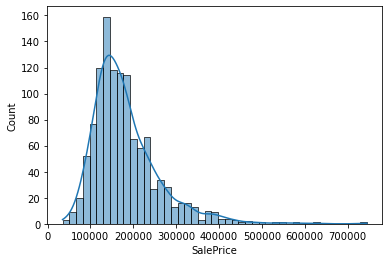

In [48]:
# Olhando para o target na base de treino
sns.histplot(y_train, kde = True);

In [49]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

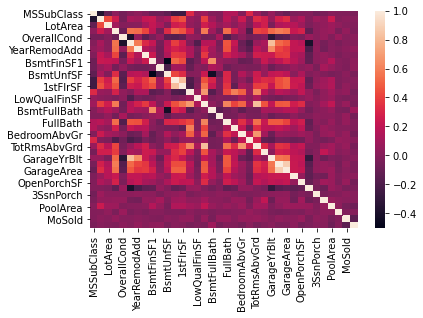

In [50]:
# Olhando o heatmap da base de treino de features
sns.heatmap(X_train.corr());

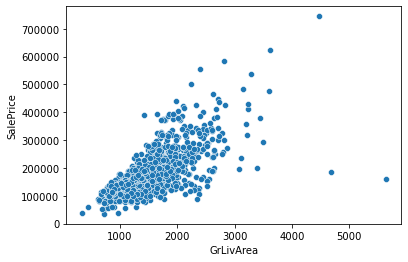

In [51]:
# Olhando a variável "GrLivArea"
sns.scatterplot(x= X_train["GrLivArea"], y= y_train);

In [52]:
# vamos remover aqueles dois outliers no canto direito com .query("<feature>").index
ind = X_train.query("GrLivArea > 4500").index
X_train.drop(index = ind, inplace = True)
y_train.drop(index = ind, inplace = True)

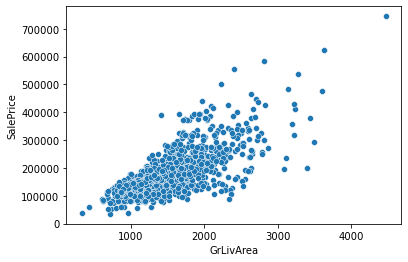

In [53]:
# Olhando a variável "GrLivArea", agora sem os outliers
sns.scatterplot(x= X_train["GrLivArea"], y= y_train);

In [54]:
# Construção de um modelo de regressão linear simples, utilizando o target "SalePrice" e uma feature "GrLivArea"

# Primeiro, colocamos a feature em formato de um array (vetor no sentido matemático, dados em uma coluna), convenção do sklearn
X_train_1d = X_train["GrLivArea"].values.reshape(-1,1)

In [58]:
X_train_1d.shape

(1166, 1)

In [59]:
# Importamos a classe LinearRegression do pacote linear_model
from sklearn.linear_model import LinearRegression

# Instanciamos o objeto estimador
reglin = LinearRegression()

# treinar o modelo com os dados de treino
reglin.fit(X_train_1d, y_train)

LinearRegression()

In [60]:
vars(reglin)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([112.12517083]),
 '_residues': 3269050466968.8315,
 'rank_': 1,
 'singular_': array([17148.49137244]),
 'intercept_': 10895.38004325697}

In [64]:
#b0, b1
reglin.intercept_, reglin.coef_

(10895.38004325697, array([112.12517083]))

$ f_{H, \vec{b}} = b_0 + b_1 X $

$ f_{H, \vec{b}} = 10895.38 + 112.12 X $

$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix} = \begin{bmatrix}
10895.38\\ 
112.12
\end{bmatrix}$

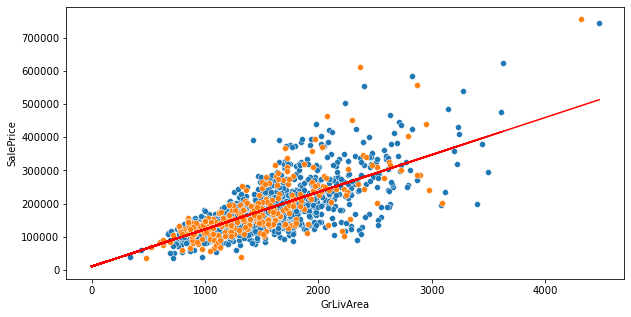

In [72]:
# Vendo em um gráfico
plt.figure(figsize=(10,5))
# scatter da base treino
sns.scatterplot(x = X_train["GrLivArea"], y = y_train)
# scatter da base teste
sns.scatterplot(x = X_test["GrLivArea"], y = y_test)
# função treinada!
x = np.linspace(0, X_train["GrLivArea"], 100)
y = reglin.intercept_ + reglin.coef_[0]*x
plt.plot(x, y, color = "red");

In [94]:
x = X_test["GrLivArea"].values.reshape(-1,1)
# Para fazer previsões, utilize:
y_pred = reglin.intercept_ + reglin.coef_[0]*x
# ou
y_pred = reglin.predict(x)

In [97]:
y_pred[:5]

array([130645.06248705, 304887.57795303, 126160.05565395, 197471.66430026,
       192538.15678385])

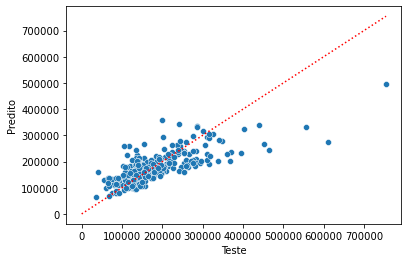

In [100]:
# Avaliação do modelo com a base teste. Comparemos o valor y_test (eixo x) com y_pred (eixo y)
# função y = x
x = np.linspace(0, y_test.max())
y = x
plt.plot(x,y, color='red', ls=':')

# Comparando y_test com y_pred
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Teste")
plt.ylabel("Predito");

# Não está muito espalhado. Visualmente, está bom, mas é preciso verificar com números

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# Não é muito bom!

0.5675383176324451

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64

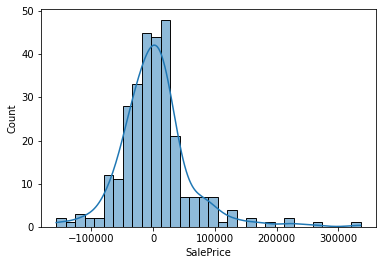

In [104]:
# Uma das premissas da visão mais estatística da regressão linear é que os resíduos (erros) sejam normalmente distribuídos. 
# Caso contrário, reveja se a regressão linear é um modelo adequado

residuos = y_test - y_pred
sns.histplot(residuos, kde = True);
residuos.describe()

In [ ]:
# As três principais métricas de avaliação do modelo de regressão linear:
# MAE: média do valor absoluto de todos os resíduos
# MSE: média dos erros quadrados
# RMSE: raiz quadrado da média dos erros quadrados
# MAPE: erro médio relativo ao valor real dos targets
# Essas métricas podem ser utilizadas como função de custo a serem minimizadas pelo estimador

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# MAE
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
# MSE
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
# RMSE
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
# MAPE
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

MAE: 38473.84
MSE: 3317122175.87
RMSE: 57594.46
MAPE: 0.23


In [ ]:
def r2_adj(r2, y, X):
    # R2 score
    r2 = r2_score(y_test, y_pred)
    return 1 - (1-r2)*(len(y) - 1)/(len(y) - X.shape[1] - 1)

In [181]:
# Criando uma função que treina e avalia Regressão
# -------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Função plotar o gráfico comparativo y_test e y_pred
def plot_scatter_real_pred(y_test, y_pred):
    # y = x 
    x = np.linspace(0, y_test.max())
    y = x
    
    plt.title("Target real vs Target predito")
    plt.plot(x, y, color='red', ls=':')
    
    sns.scatterplot(x= y_test, y=y_pred)
    plt.xlabel("Real")
    plt.ylabel("Predito");
    
# Função treinar e avaliar Regressão Linear
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot = True, plot2 = True):
    
    # pt1 - Construção do modelo
    reglin = LinearRegression().fit(X_train, y_train)
    
    # pt2 - Avaliação do modelo
    y_pred = reglin.predict(X_test)
    
    #-----------------------------------------------
    # Métricas de modelo
    print("Métricas de Avaliação com os dados do teste")
    
    if plot:
        # Scatterplot de comparação
        plot_scatter_real_pred(y_test, y_pred)
        plt.show()
    
    # Métricas de avaliação
    r2 = r2_score(y_test, y_pred)
    print(f"R2: {r2:.2f}")
    print(f"R2 adj: {r2_adj(r2, y_test, X_test):.2f}") # ativar se houver mais features
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}\n")

    # Análise dos resíduos (Deve ser uma distribuição normal)
    residuos = y_test - y_pred
    print(residuos.describe())
    if plot2:
        sns.histplot(residuos, kde = True)
        plt.show()
    
    return reglin

Métricas de Avaliação com os dados do teste
R2: 0.57
R2 adj: 0.57
MAE: 38473.84
MSE: 3317122175.87
RMSE: 57594.46
MAPE: 0.23

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64


LinearRegression()

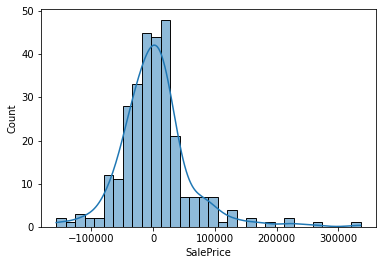

In [182]:
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train,
                X_test["GrLivArea"].values.reshape(-1,1), y_test, plot = False, plot2 = True)

In [184]:
# Regressão Linear Múltipla
X_train.select_dtypes(include = np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 254 to 1126
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1166 non-null   int64  
 1   LotFrontage    949 non-null    float64
 2   LotArea        1166 non-null   int64  
 3   OverallQual    1166 non-null   int64  
 4   OverallCond    1166 non-null   int64  
 5   YearBuilt      1166 non-null   int64  
 6   YearRemodAdd   1166 non-null   int64  
 7   MasVnrArea     1160 non-null   float64
 8   BsmtFinSF1     1166 non-null   int64  
 9   BsmtFinSF2     1166 non-null   int64  
 10  BsmtUnfSF      1166 non-null   int64  
 11  TotalBsmtSF    1166 non-null   int64  
 12  1stFlrSF       1166 non-null   int64  
 13  2ndFlrSF       1166 non-null   int64  
 14  LowQualFinSF   1166 non-null   int64  
 15  GrLivArea      1166 non-null   int64  
 16  BsmtFullBath   1166 non-null   int64  
 17  BsmtHalfBath   1166 non-null   int64  
 18  FullBa

In [185]:
# Verificando nulos 
nulos = X_train.select_dtypes(include = np.number).isna().sum()
nulos[nulos > 0]

LotFrontage    217
MasVnrArea       6
GarageYrBlt     64
dtype: int64

In [186]:
# Vamos utlizar somente as variáveis numéricas e eliminar os nulos
X_train_model = X_train.select_dtypes(include = np.number).dropna(axis = 1)
X_test_model = X_test.loc[:,X_train_model.columns]
X_train_model.shape, X_test_model.shape

((1166, 33), (292, 33))

Métricas de Avaliação com os dados do teste
R2: 0.84
R2 adj: 0.82
MAE: 22079.30
MSE: 1197561248.31
RMSE: 34605.80
MAPE: 0.13

count       292.000000
mean       3056.737386
std       34529.709337
min      -96351.354864
25%      -14979.745054
50%        1960.228935
75%       17067.480451
max      248823.122655
Name: SalePrice, dtype: float64


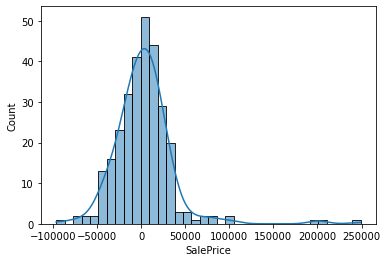

In [187]:
reglin_mult = reg_lin_pt1_pt2(X_train_model, y_train,
                              X_test_model, y_test, plot = False, plot2= True)

In [226]:
# Colocando as features em um DataFrame
pd.DataFrame(reglin_mult.coef_, index = reglin_mult.feature_names_in_, columns = ["parametros"])

,parametros
MSSubClass,-126.375182
LotArea,0.532994
OverallQual,15287.249591
OverallCond,4579.132457
YearBuilt,405.105414
YearRemodAdd,182.715322
BsmtFinSF1,25.122184
BsmtFinSF2,-4.470752
BsmtUnfSF,1.365685
TotalBsmtSF,22.017117


In [231]:
# Podemos atribuir importância por escalagem de dados (pré processamento)
from sklearn.preprocessing import MinMaxScaler

# Instanciando um objeto de escalagem e treinando
mms = MinMaxScaler().fit(X_train_model)

# Ambas bases estão com os valores das features escaladas
X_train_model_mms = pd.DataFrame(mms.transform(X_train_model), columns = X_train_model.columns, index = X_train_model.index)
X_test_model_mms = pd.DataFrame(mms.transform(X_test_model), columns = X_test_model.columns, index = X_test_model.index)

In [237]:
# Criando uma função 2.0 que treina e avalia Regressão
# -------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Função plotar o gráfico comparativo y_test e y_pred
def plot_scatter_real_pred(y_test, y_pred):
    # y = x 
    x = np.linspace(0, y_test.max())
    y = x
    
    plt.title("Target real vs Target predito")
    plt.plot(x, y, color='red', ls=':')
    
    sns.scatterplot(x= y_test, y=y_pred)
    plt.xlabel("Real")
    plt.ylabel("Predito");
    
# Função treinar e avaliar Regressão Linear
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot = False, plot2 = False, mms = False):
    
    if mms:
        mms = MinMaxScaler().fit(X_train)
        X_train = pd.DataFrame(mms.transform(X_train), columns = X_train.columns, index = X_train.index)
        X_test = pd.DataFrame(mms.transform(X_test), columns = X_test.columns, index = X_test.index)
    
    # pt1 - Construção do modelo
    reglin = LinearRegression().fit(X_train, y_train)
    
    # pt2 - Avaliação do modelo
    y_pred = reglin.predict(X_test)
    
    #-----------------------------------------------
    # Métricas de modelo
    print("Métricas de Avaliação com os dados do teste")
    
    if plot:
        # Scatterplot de comparação
        plot_scatter_real_pred(y_test, y_pred)
        plt.show()
    
    # Métricas de avaliação
    r2 = r2_score(y_test, y_pred)
    print(f"R2: {r2:.2f}")
    print(f"R2 adj: {r2_adj(r2, y_test, X_test):.2f}") # ativar se houver mais features
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}\n")

    # Análise dos resíduos (Deve ser uma distribuição normal)
    residuos = y_test - y_pred
    print(residuos.describe())
    if plot2:
        sns.histplot(residuos, kde = True)
        plt.show()
    
    return reglin

In [238]:
# Métricas da Regressão linear multipla escalada
reglin_mult_mms = reg_lin_pt1_pt2(X_train_model, y_train,
                                  X_test_model, y_test, mms = True)

Métricas de Avaliação com os dados do teste
R2: 0.84
R2 adj: 0.82
MAE: 22079.30
MSE: 1197561248.31
RMSE: 34605.80
MAPE: 0.13

count       292.000000
mean       3056.737386
std       34529.709337
min      -96351.354864
25%      -14979.745054
50%        1960.228935
75%       17067.480451
max      248823.122655
Name: SalePrice, dtype: float64


In [241]:
X_test_model_mms.describe().loc[["min","max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.000893,0.111111,0.125,0.057971,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.0,0.0
max,1.0,0.324668,1.000000,1.000,0.992754,1.0,1.043893,1.307897,0.874144,1.001875,...,1.025074,0.543757,0.500914,0.576087,0.468504,0.825,0.780488,0.03871,1.0,1.0


In [246]:
params_df = pd.DataFrame(reglin_mult_mms.coef_, index=reglin_mult_mms.feature_names_in_, columns=["param_value"])
# Parâmetros mais importantes são aqueles com maiores valores de features
params_df.abs().sort_values("param_value", ascending = False).head(10)

,param_value
OverallQual,137585.246320
GrLivArea,114119.023179
LotArea,114031.418861
1stFlrSF,101734.974041
BedroomAbvGr,100461.867356
2ndFlrSF,86294.868588
BsmtFinSF1,63775.186275
YearBuilt,55904.547197
TotalBsmtSF,53479.066031
TotRmsAbvGrd,51515.231898


In [247]:
# Pode melhorar os resultados acima? Fazendo uma feature selection ou utlizar uma feature categórica ou mesmo criar novas features

----
----

### Regressão Logística

- Qual o dataset?
- EDA
- Idnetificação das features e do target
- Regressão Logística
    - Função de perda e algoritmo de aprendizagem 
    - Construção do modelo
    - Avaliação do modelo - Métricas de performance para problemas de classificação
        - Tradeoff precision recall
        - Curva ROC e AUC-ROC
        - Classificação multiclasse (capturar o score pelo método decision_function)

---

In [2]:
mkt_df = pd.read_csv("datasets/advertising.csv")
mkt_df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [3]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
mkt_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
mkt_model = mkt_df.select_dtypes(include = np.number)

In [6]:
# Separando as features e o target
X = mkt_model.drop("Clicked on Ad", axis = 1)
y = mkt_model["Clicked on Ad"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

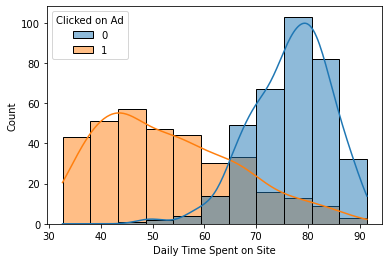

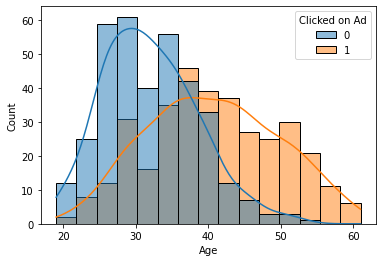

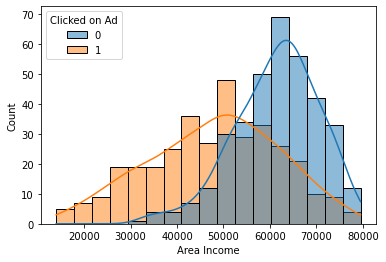

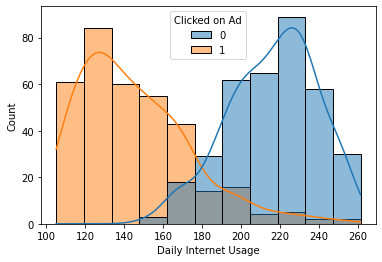

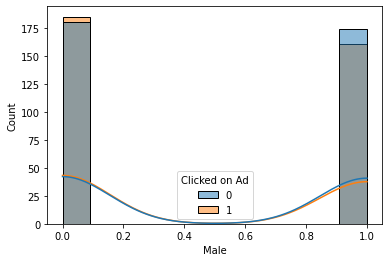

In [8]:
# Quando fazemos um EDA em problemas de classificação, usamos o target para separabilidade de classes
for col in X_train:
    sns.histplot(data = X_train, x = col, kde = True, hue = y_train)
    plt.show(); # plt.show() plota cada gráfico em uma figura diferente,';' coloca na mesma figura

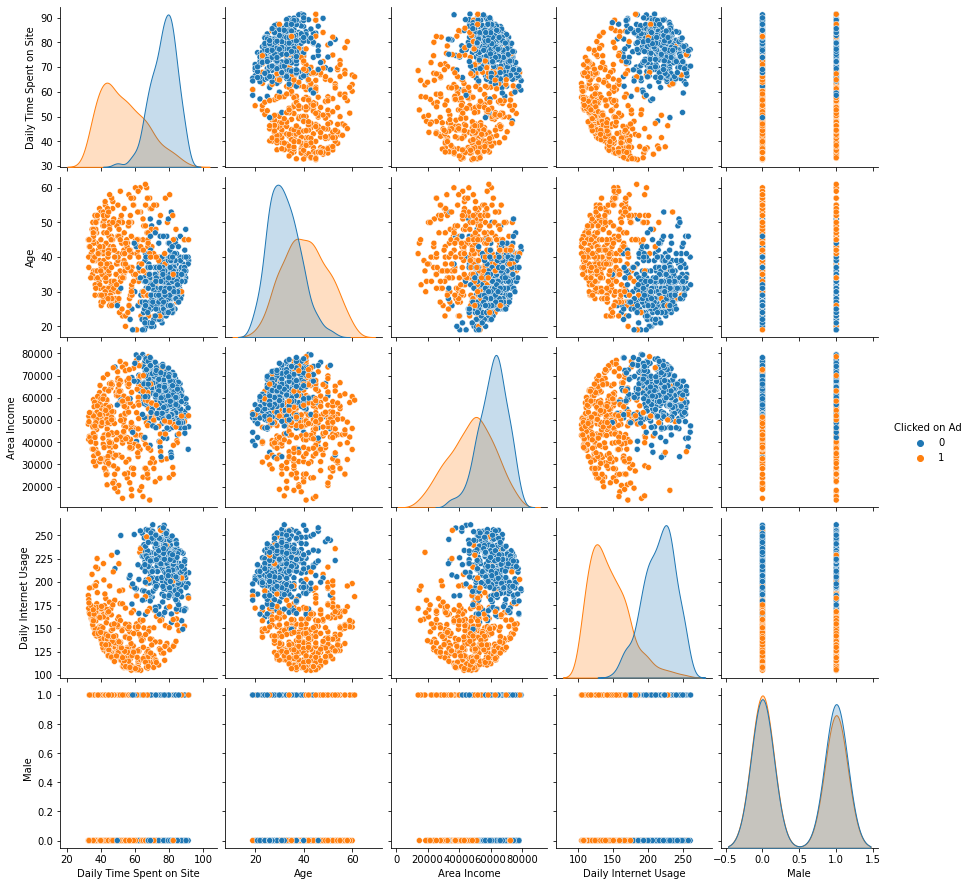

In [9]:
# No pairplot
data = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(data = data, hue = "Clicked on Ad")

In [23]:
# Fazendo a EDA na base de treino, vemos que os dados são bem separáveis e possíveis de identificar

In [10]:
# Construção do modelo
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(X_train, y_train)

In [11]:
vars(logit)

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['Daily Time Spent on Site', 'Age', 'Area Income',
        'Daily Internet Usage', 'Male'], dtype=object),
 'n_features_in_': 5,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([76]),
 'coef_': array([[-5.61839608e-02,  2.65933604e-01, -1.62153396e-05,
         -2.74019904e-02,  2.26459439e-03]]),
 'intercept_': array([0.00549774])}

In [12]:
test_pred_df = pd.DataFrame(data = pd.concat([pd.Series(y_test.values), pd.Series(logit.predict(X_test))], axis = 1))
test_pred_df.head()

,0,1
0,1,0
1,1,1
2,1,1
3,1,1
4,0,0


In [16]:
# Podemos pegar a probabilidade calculada com P(y=1|x) = 1/(1+exp(-z)), onde z é a equação linear
proba = logit.predict_proba(X_test)[:,1]
proba[:10]

# logit.predict_proba(X_test) retorna um array de listas com, nesse caso, dois elementos que representam 0 (não clicou) e 1 (clicou)

array([0.49410025, 0.99698029, 0.95047109, 0.98997332, 0.02994942,
       0.28464876, 0.02335017, 0.9907872 , 0.30860051, 0.94813735])

In [45]:
# Com .predict_proba(X_test)[:,1] podemos definir outros cutoffs
cutoff = 0.9
np.where(proba >= cutoff, 1, 0)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [19]:
# Vamos avaliar as métricas de performance para problemas de classificação
# Determinar as probabilidades, assim definimos uma cutoff arbitrária
proba_1 = logit.predict_proba(X_test)[:,1]
cutoff = 0.5
y_pred = np.where(proba_1 >= cutoff, 1, 0)
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [21]:
# Matriz de Confusão e métricas de classificação
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[140   6]
 [ 25 129]]


In [24]:
cm = confusion_matrix(y_test, y_pred)

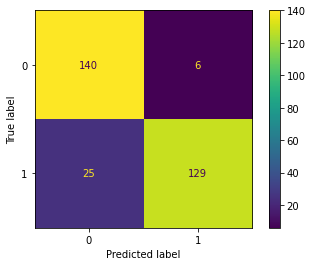

In [29]:
# ou
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [34]:
# Coletando dados da Matriz de Confusão
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# Para o valor "1" ("Clicked on Ad"), temos um valor de f1 bem alto

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [35]:
cr = classification_report(y_test, y_pred, output_dict = True)
cr

{'0': {'precision': 0.8484848484848485,
  'recall': 0.958904109589041,
  'f1-score': 0.9003215434083601,
  'support': 146},
 '1': {'precision': 0.9555555555555556,
  'recall': 0.8376623376623377,
  'f1-score': 0.8927335640138409,
  'support': 154},
 'accuracy': 0.8966666666666666,
 'macro avg': {'precision': 0.902020202020202,
  'recall': 0.8982832236256894,
  'f1-score': 0.8965275537111005,
  'support': 300},
 'weighted avg': {'precision': 0.9034478114478115,
  'recall': 0.8966666666666666,
  'f1-score': 0.8964263806525069,
  'support': 300}}

In [43]:
# Criar uma função que fornece a matriz de Confusão e as métricas de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def clf_metrics(model, X, y, cutoff = 0.5, label_metrica = "", plot = True):
    
    proba = model.predict_proba(X)[:,1]
    y_pred = np.where(proba >= cutoff, 1, 0)
    
    if plot:
        print(f"Métricas de avaliação de {label_metrica}")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.show()
        print(classification_report(y, y_pred))
    
    return classification_report(y, y_pred, output_dict=True)

Métricas de avaliação de Treino


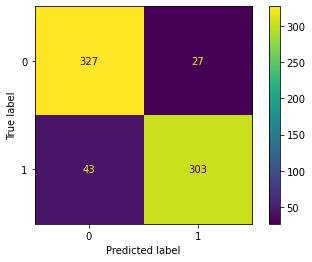

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700



In [45]:
cr_train = clf_metrics(logit, X_train, y_train, cutoff= 0.5,  label_metrica = "Treino")

Métricas de avaliação de Teste


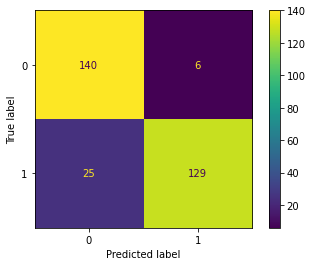

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [46]:
cr_test = clf_metrics(logit, X_test, y_test, cutoff= 0.5, label_metrica = "Teste")

In [57]:
# Em DataFrame
train_df = pd.DataFrame(cr_train)
test_df = pd.DataFrame(cr_test)

train_df
# Mesmo formato para test_df

,0,1,accuracy,macro avg,weighted avg
precision,0.883784,0.918182,0.9,0.900983,0.900786
recall,0.923729,0.875723,0.9,0.899726,0.900000
f1-score,0.903315,0.896450,0.9,0.899882,0.899922
support,354.000000,346.000000,0.9,700.000000,700.000000


In [64]:
# Criação de um dict com as classification_metrics
results_train={"cutoff": []}
# Não adicionar o support nesse resultado
for index in train_df.index[:-1]:
    for col in train_df:
        results_train[f"{index}_{col}"] = [] # Criação de uma chave-valor no dicionário

results_test={"cutoff": []}
# Não adicionar o support nesse resultado
for index in test_df.index[:-1]:
    for col in test_df:
        results_test[f"{index}_{col}"] = []


Usando o cutoff de 0.1

Métricas de avaliação de Treino


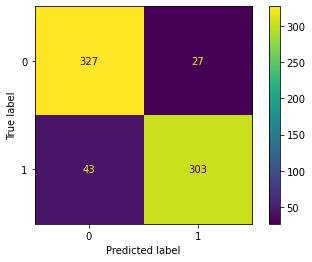

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


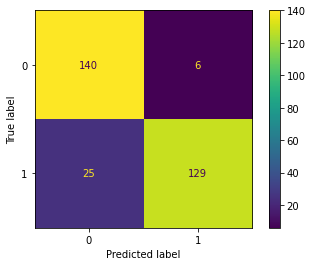

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.15000000000000002

Métricas de avaliação de Treino


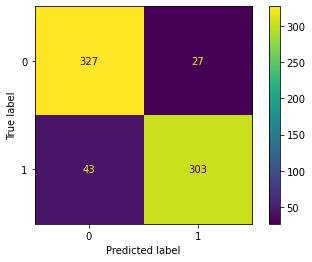

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


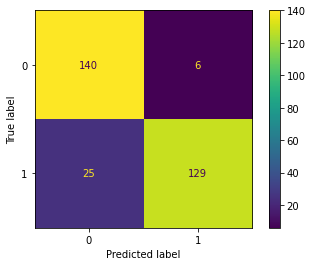

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.20000000000000004

Métricas de avaliação de Treino


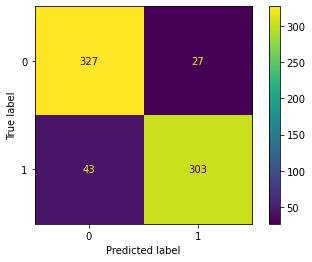

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


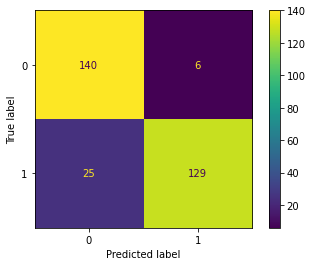

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.25000000000000006

Métricas de avaliação de Treino


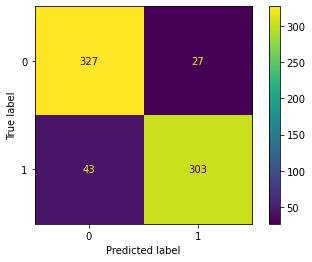

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


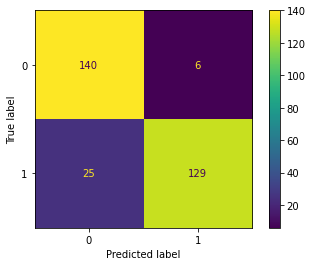

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.30000000000000004

Métricas de avaliação de Treino


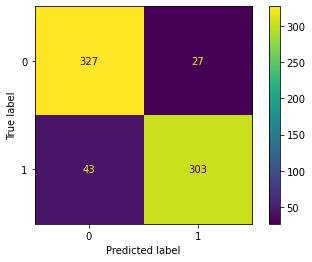

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


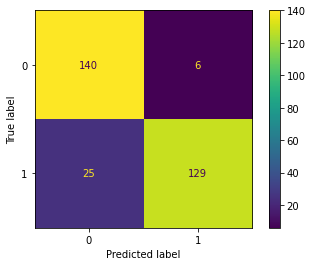

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.3500000000000001

Métricas de avaliação de Treino


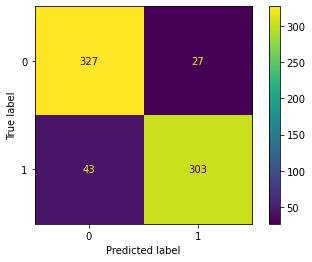

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


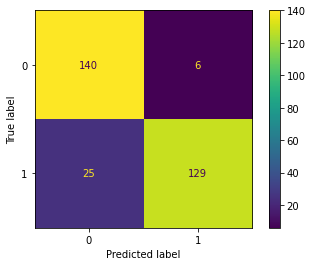

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.40000000000000013

Métricas de avaliação de Treino


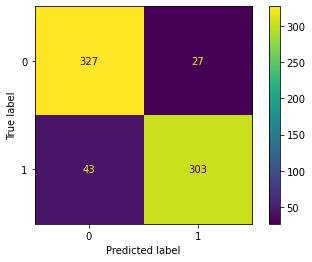

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


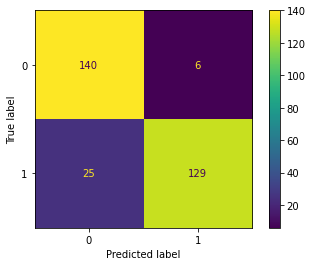

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.45000000000000007

Métricas de avaliação de Treino


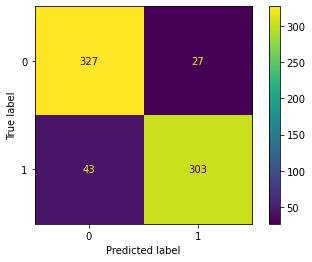

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


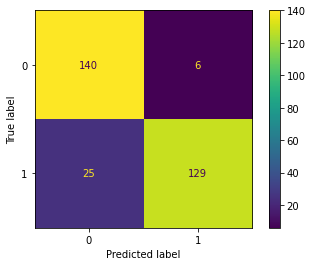

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.5000000000000001

Métricas de avaliação de Treino


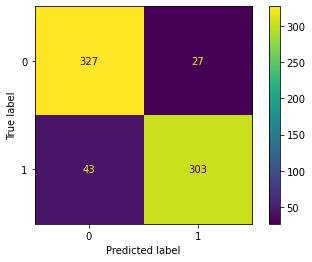

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


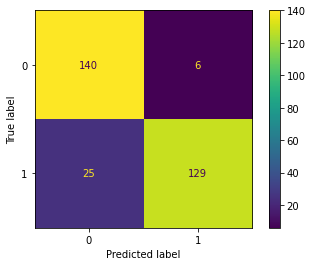

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.5500000000000002

Métricas de avaliação de Treino


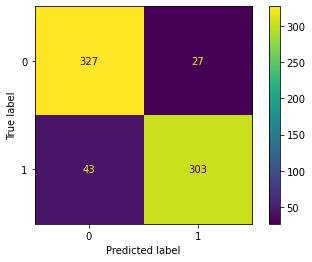

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


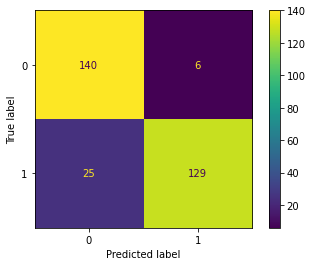

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.6000000000000002

Métricas de avaliação de Treino


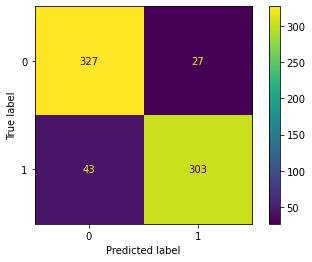

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


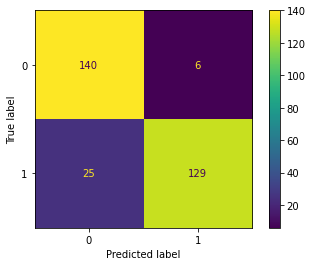

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.6500000000000001

Métricas de avaliação de Treino


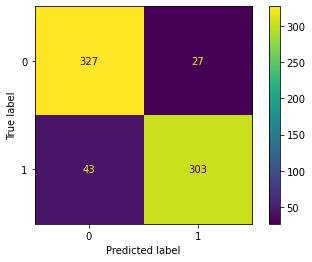

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


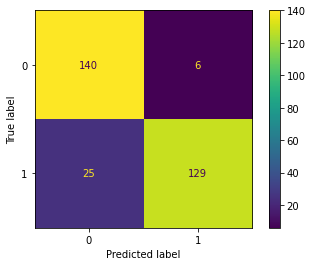

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.7000000000000002

Métricas de avaliação de Treino


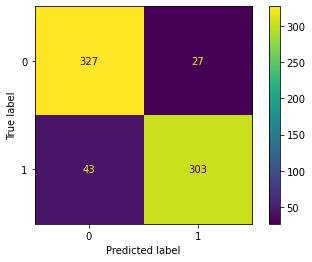

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


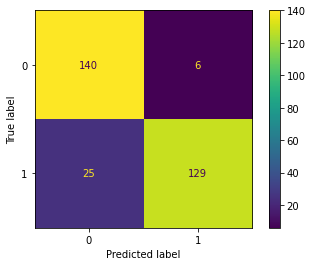

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.7500000000000002

Métricas de avaliação de Treino


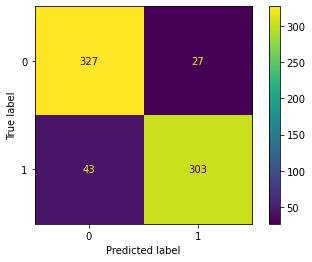

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


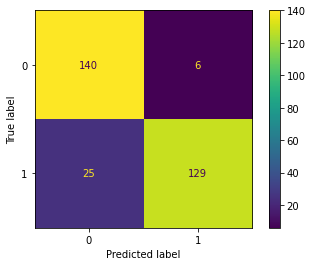

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.8000000000000002

Métricas de avaliação de Treino


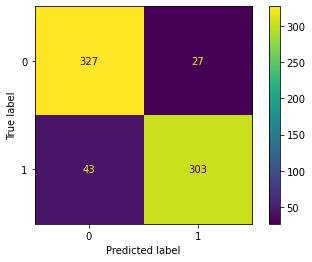

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


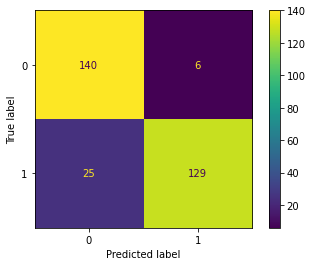

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.8500000000000002

Métricas de avaliação de Treino


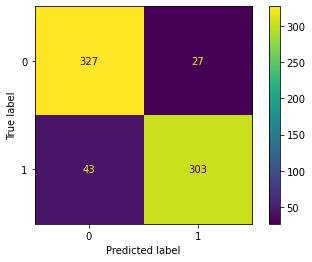

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


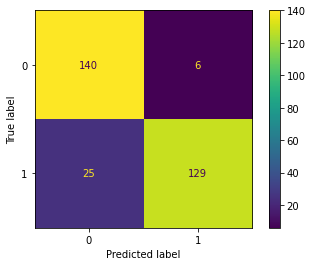

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.9000000000000002

Métricas de avaliação de Treino


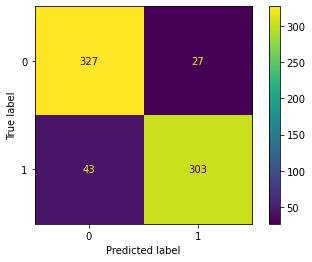

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


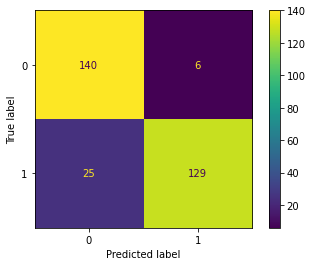

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------

Usando o cutoff de 0.9500000000000003

Métricas de avaliação de Treino


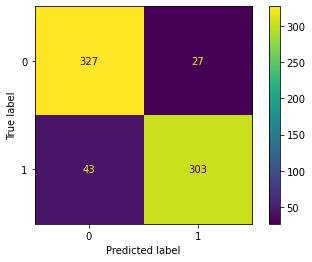

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Métricas de avaliação de Teste


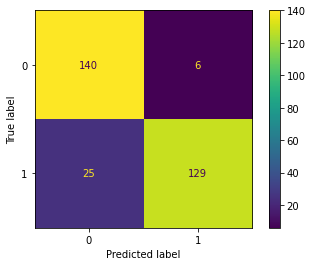

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

--------------------------------------------------------------------------------


In [67]:
# Verificação de métricas em vários cutoffs
cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    print()
    print(f"Usando o cutoff de {cutoff}")
    print()
    
    # Métricas de dados de treino
    cr_train = clf_metrics(logit, X_train, y_train, cutoff = 0.5, label_metrica = "Treino")
    cr_train_df = pd.DataFrame(cr_train)
    
    results_train["cutoff"].append(cutoff)
    for index in cr_train_df.index[:-1]:
        for col in cr_train_df:
            results_train[f"{index}_{col}"].append(cr_train_df.loc[index, col])
    # Métricas de dados de teste
    cr_test = clf_metrics(logit, X_test, y_test, cutoff = 0.5, label_metrica = "Teste")
    cr_test_df = pd.DataFrame(cr_test)
    
    results_test["cutoff"].append(cutoff)
    for index in cr_test_df.index[:-1]:
        for col in cr_test_df:
            results_test[f"{index}_{col}"].append(cr_test_df.loc[index, col])
    print("-"*80)

In [72]:
# Resultados variandoo cutoff em DataFrame
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

results_test_df.sort_values("f1-score_1", ascending = False).head(5)

,cutoff,precision_0,precision_1,precision_accuracy,precision_macro avg,precision_weighted avg,recall_0,recall_1,recall_accuracy,recall_macro avg,recall_weighted avg,f1-score_0,f1-score_1,f1-score_accuracy,f1-score_macro avg,f1-score_weighted avg
0,0.10,0.848485,0.955556,0.896667,0.90202,0.903448,0.958904,0.837662,0.896667,0.898283,0.896667,0.900322,0.892734,0.896667,0.896528,0.896426
40,0.30,0.848485,0.955556,0.896667,0.90202,0.903448,0.958904,0.837662,0.896667,0.898283,0.896667,0.900322,0.892734,0.896667,0.896528,0.896426
29,0.65,0.848485,0.955556,0.896667,0.90202,0.903448,0.958904,0.837662,0.896667,0.898283,0.896667,0.900322,0.892734,0.896667,0.896528,0.896426
30,0.70,0.848485,0.955556,0.896667,0.90202,0.903448,0.958904,0.837662,0.896667,0.898283,0.896667,0.900322,0.892734,0.896667,0.896528,0.896426
31,0.75,0.848485,0.955556,0.896667,0.90202,0.903448,0.958904,0.837662,0.896667,0.898283,0.896667,0.900322,0.892734,0.896667,0.896528,0.896426


In [73]:
y_proba = logit.predict_proba(X_test)[:,1]

In [74]:
# Tradeoff precision/recall
from sklearn.metrics import precision_recall_curve

precisions, recalls, cutoffs = precision_recall_curve(y_test, y_proba)

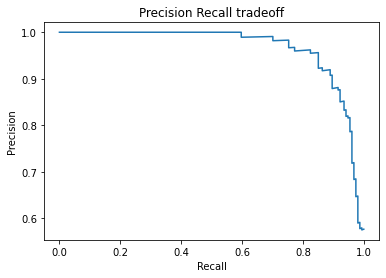

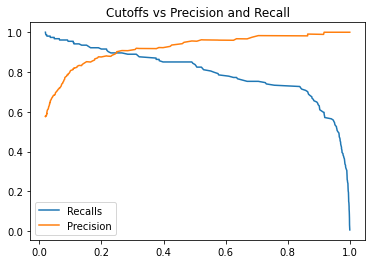

In [80]:
plt.title("Precision Recall tradeoff")
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print()

plt.title("Cutoffs vs Precision and Recall")
plt.plot(cutoffs, recalls[:-1], label = "Recalls")
plt.plot(cutoffs, precisions[:-1], label = "Precision")
plt.legend()
plt.show()

In [81]:
# Curva AUC-ROC
from sklearn.metrics import roc_curve

fpr, tpr, cutoffs = roc_curve(y_test, y_proba)

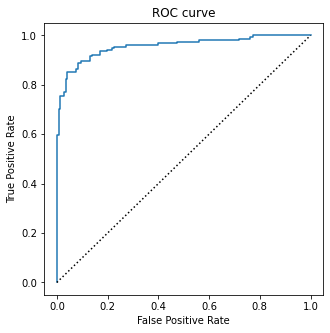

In [86]:
plt.figure(figsize=(5,5))
plt.title("ROC curve")
# Curva ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

x = np.linspace(0,1,2)
plt.plot(x, x, color="black", ls=":")
plt.show()

In [87]:
# Calculando a Area Under the Curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba)
# Bom resultado

0.9559242127735279

In [88]:
# Regressão Logística Multinomial
# Calculando o score z(x) = b0 + b1x1 + ... + bnxn

# Valores de X para o primeiro elemento
X_test.iloc[0]

Daily Time Spent on Site       63.26
Age                            29.00
Area Income                 54787.37
Daily Internet Usage          120.46
Male                            1.00
Name: 521, dtype: float64

In [89]:
# Valores de b para o primeiro elemento
logit.intercept_, logit.coef_[0]

(array([0.00549774]),
 array([-5.61839608e-02,  2.65933604e-01, -1.62153396e-05, -2.74019904e-02,
         2.26459439e-03]))

In [93]:
z0 = logit.intercept_ + (X_test.iloc[0].values*logit.coef_[0]).sum()
z0

array([-0.02360008])

In [97]:
# O z0 é o valor do score para o primeiro elemento
# Podemos pegar o score (z) de todos os modelos de uma vez com o método decision_function
logit.decision_function(X_test)[0]

-0.023600083757146322

In [99]:
# Qual é a probabilidade com esse score?
1/(1+np.exp(-z0))

array([0.49410025])

In [101]:
# É o mesmo que...
logit.predict_proba(X_test)[:,1][0]

0.49410025288704457

----
----

### Espaço de features polinomiais e hipóteses mais complexas

- Espaço de features polinomiais (modelos mais simples podem sofrer underfitting)
- A medida que aumentamos a complexidade, podemos chegar em overfitting

---

In [104]:
# Módulo com as funções utilizadas em Regressão Linear
from ml_utils import *

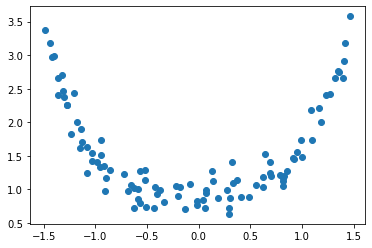

In [112]:
# Criando dados não lineares
np.random.seed(42)
N = 100
X = np.random.uniform(-1.5, 1.5, N)
b0, b1, b2, b3, b4 = 1, 0.1, 0, 0, 0.5
y = b0 + b1*X + b2*(X**2) + b3*(X**3) + b4*(X**4) + np.random.normal(0, 0.2, N)
plt.scatter(X, y)
plt.show()

In [113]:
# Deixando os dados no formato conveniente
X = X.reshape(-1,1)
X[:5]

array([[-0.37637964],
       [ 1.35214292],
       [ 0.69598183],
       [ 0.29597545],
       [-1.03194408]])

----
-----

### Regularização

- Principal ideia: Introduzir as features polinomiais, aumentando a complexidade da hipótese, mas nem tanto.
- O objetivo da Regularização é diminuir a complexidade de modelos, de modo a evitar que particularidades da base treino (ruídos) sejam aprendidos
- A Regularização restringe o espaço de hipótese acessível
- Conceito: Espaço de Parâmetros é o conjunto de todos os vetores de parâmetros possíveis para a hipótese
    - Ex.: na regrssão linear simples, $ f_{H, \vec{b}} = b_0 + b_1 X $, o vetor de parâmetros é $\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$. Como $b_0$ e $b_1$ podem assumir qualquer valor real ($b_0, b_1 \in \mathbb{R}$), temos que o espaço de parâmetros é o **plano**, também conhecido como $\mathbb{R}^2$.

- https://www.geogebra.org/m/zwrd2p9g
- Exemplos de Regularização

----

-----
-----